In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from pandas_profiling import ProfileReport
from pydicom import dcmread
import os
from tqdm import tqdm
import cv2
import pydicom
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from IPython.display import Image, display as idisplay
import PIL
from PIL import Image

def display(img, resize = None):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    r = resize / max(h, w)
    new_h, new_w = int(r * h), int(r * w)
    if resize:
        img = cv2.resize(img, (new_w, new_h))
    idisplay(Image.fromarray(img))
    print('\n--------------------------\n')

In [2]:
DATA_ROOT = '../datasets/train_images/'
UINT8_IMG_DIR = '../datasets/export/uint8_png/'
def get_dicom(patient_id, img_id):
    return dcmread(os.path.join(DATA_ROOT, str(patient_id), str(img_id) + '.dcm'))

def display_dcm(patient_id, image_id):
    img_path = os.path.join(UINT8_IMG_DIR, str(patient_id) + '@' + str(image_id) + '.png')
    print(img_path)
    img = cv2.imread(img_path)
    display(img, resize = 320)

In [3]:
def str2list(s):
    if s[0] != '[':
        return [float(s)]
    assert s[0] == '[' and s[-1] == ']', str(s)
    s = s[1:-1]
    return [float(s) for s in s.split(',')]

In [ ]:
meta_df = pd.read_csv('../datasets/train_meta.csv')
meta_df.drop(columns = 'patient_id', inplace = True)
meta_df.rename(columns = {name:'__' + name for name in meta_df.columns if name != 'image_id'}, inplace = True)
meta_df['__WindowCenterList'] = meta_df['__WindowCenter'].apply(str2list)
meta_df['__WindowCenterListLength'] = meta_df['__WindowCenterList'].apply(len)
meta_df['__WindowWidthList'] = meta_df['__WindowWidth'].apply(str2list)
meta_df['__WindowWidthListLength'] = meta_df['__WindowWidthList'].apply(len)
meta_df

In [ ]:
train_df = pd.read_csv('../datasets/train.csv')
train_df

In [6]:
train_df.image_id.nunique()

54706

In [7]:
merged = pd.merge(
    train_df,
    meta_df,
    how="inner",
    on='image_id',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("", "__"),
    copy=True,
    indicator=False,
    validate='1:1',
)
merged

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,130.7771,AutoFilter,[2047.0],1,[4096.0],1
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1062 mm 490 mm 180 mm ...,"[2616.0, 2676.0, 2496.0]",3,"[900.0, 750.0, 1050.0]",3
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1092 mm 370 mm 180 mm ...,"[2614.0, 2668.0, 2512.0]",3,"[900.0, 750.0, 1050.0]",3
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.9989,US,NaN,12,60.0000,AOP standard RECTANGLE 822 mm 490 mm 180 mm 2...,"[2638.0, 2674.0, 2572.0]",3,"[900.0, 750.0, 1050.0]",3


In [8]:
merged.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case', '__Columns',
       '__ImageLaterality', '__PatientID', '__RescaleSlope',
       '__LossyImageCompression', '__VOILUTFunction', '__ContentDate',
       '__RescaleIntercept', '__ExposureControlMode', '__Rows',
       '__InstanceNumber', '__PixelRepresentation', '__SOPInstanceUID',
       '__PixelPaddingValue', '__SeriesInstanceUID', '__HighBit',
       '__PhotometricInterpretation', '__PixelIntensityRelationshipSign',
       '__SamplesPerPixel', '__PixelSpacing', '__ContentTime',
       '__BitsAllocated', '__BodyPartThickness',
       '__PixelIntensityRelationship', '__WindowCenter', '__WindowWidth',
       '__StudyInstanceUID', '__RescaleType', '__PartialView', '__BitsStored',
       '__CompressionForce', '__ExposureControlModeDescription',
       '__WindowCenterList', '__WindowCenterListLength', 

In [9]:
df = merged
df = df.reset_index(drop = True)
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,130.7771,AutoFilter,[2047.0],1,[4096.0],1
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1062 mm 490 mm 180 mm ...,"[2616.0, 2676.0, 2496.0]",3,"[900.0, 750.0, 1050.0]",3
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1092 mm 370 mm 180 mm ...,"[2614.0, 2668.0, 2512.0]",3,"[900.0, 750.0, 1050.0]",3
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.9989,US,NaN,12,60.0000,AOP standard RECTANGLE 822 mm 490 mm 180 mm 2...,"[2638.0, 2674.0, 2572.0]",3,"[900.0, 750.0, 1050.0]",3


In [10]:
META_COLS = [name for name in df.columns if name.startswith('__')]
META_COLS.remove('__WindowCenterList')
META_COLS.remove('__WindowWidthList')
META_COLS

['__Columns',
 '__ImageLaterality',
 '__PatientID',
 '__RescaleSlope',
 '__LossyImageCompression',
 '__VOILUTFunction',
 '__ContentDate',
 '__RescaleIntercept',
 '__ExposureControlMode',
 '__Rows',
 '__InstanceNumber',
 '__PixelRepresentation',
 '__SOPInstanceUID',
 '__PixelPaddingValue',
 '__SeriesInstanceUID',
 '__HighBit',
 '__PhotometricInterpretation',
 '__PixelIntensityRelationshipSign',
 '__SamplesPerPixel',
 '__PixelSpacing',
 '__ContentTime',
 '__BitsAllocated',
 '__BodyPartThickness',
 '__PixelIntensityRelationship',
 '__WindowCenter',
 '__WindowWidth',
 '__StudyInstanceUID',
 '__RescaleType',
 '__PartialView',
 '__BitsStored',
 '__CompressionForce',
 '__ExposureControlModeDescription',
 '__WindowCenterListLength',
 '__WindowWidthListLength']

In [11]:
META_NUM_UNIQUE = {}
for meta_col in META_COLS:
    META_NUM_UNIQUE[meta_col] = df[meta_col].nunique()
    print(meta_col, META_NUM_UNIQUE[meta_col])
    

__Columns 10
__ImageLaterality 2
__PatientID 11913
__RescaleSlope 1
__LossyImageCompression 1
__VOILUTFunction 2
__ContentDate 1
__RescaleIntercept 1
__ExposureControlMode 4
__Rows 11
__InstanceNumber 54706
__PixelRepresentation 1
__SOPInstanceUID 54706
__PixelPaddingValue 117
__SeriesInstanceUID 11913
__HighBit 3
__PhotometricInterpretation 2
__PixelIntensityRelationshipSign 2
__SamplesPerPixel 1
__PixelSpacing 4
__ContentTime 54694
__BitsAllocated 1
__BodyPartThickness 158
__PixelIntensityRelationship 1
__WindowCenter 3647
__WindowWidth 114
__StudyInstanceUID 11913
__RescaleType 1
__PartialView 1
__BitsStored 3
__CompressionForce 660
__ExposureControlModeDescription 3985
__WindowCenterListLength 4
__WindowWidthListLength 4


In [12]:
normal_df = df[df.cancer == 0].reset_index(drop = True)
cancer_df = df[df.cancer == 1].reset_index(drop = True)
print(f'cancer = {len(cancer_df)}, normal={len(normal_df)}')

cancer = 1158, normal=53548


In [13]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("../datasets/pd_profiling.html")
# profile.to_notebook_iframe()

In [14]:
# df.to_csv('../datasets/train_full_meta.csv', index = False)

In [ ]:
to_plot_cols = [k for k, v in META_NUM_UNIQUE.items() if v < 10000]
to_plot_cols.remove('__WindowCenter')
to_plot_cols.remove('__WindowWidth')
to_plot_cols.remove('__ExposureControlModeDescription')

no_plot_cols = [k for k, v in META_NUM_UNIQUE.items() if v >= 10000]
print('IGNORE PLOT FOR:', no_plot_cols)

for i, feature in enumerate(to_plot_cols):
    print('\n\n\n-------------------------------------')
    print(feature, META_NUM_UNIQUE[feature])
    print(df[feature].unique()[:10])
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    sns.set_style('darkgrid')
    sns.set_palette('Set2')

    axs = axs.flatten()
    
    # overall distribution
    _ = sns.histplot(df, x="{}".format(feature), ax=axs[0])
    _ = axs[0].set_title("overall")
    _ = axs[0].set_ylabel("")
    _ = axs[0].set_xlabel("")
    
    # normal distribution
    _ = sns.histplot(normal_df, x="{}".format(feature), ax=axs[1])
    _ = axs[1].set_title("normal")
    _ = axs[1].set_ylabel("")
    _ = axs[1].set_xlabel("")
    
    # cancer distribution
    _ = sns.histplot(cancer_df, x="{}".format(feature), ax=axs[2])
    _ = axs[2].set_title("cancer")
    _ = axs[2].set_ylabel("")
    _ = axs[2].set_xlabel("")
    
    plt.show()

## Modality LUT

In [14]:
df.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case', '__Columns',
       '__ImageLaterality', '__PatientID', '__RescaleSlope',
       '__LossyImageCompression', '__VOILUTFunction', '__ContentDate',
       '__RescaleIntercept', '__ExposureControlMode', '__Rows',
       '__InstanceNumber', '__PixelRepresentation', '__SOPInstanceUID',
       '__PixelPaddingValue', '__SeriesInstanceUID', '__HighBit',
       '__PhotometricInterpretation', '__PixelIntensityRelationshipSign',
       '__SamplesPerPixel', '__PixelSpacing', '__ContentTime',
       '__BitsAllocated', '__BodyPartThickness',
       '__PixelIntensityRelationship', '__WindowCenter', '__WindowWidth',
       '__StudyInstanceUID', '__RescaleType', '__PartialView', '__BitsStored',
       '__CompressionForce', '__ExposureControlModeDescription',
       '__WindowCenterList', '__WindowCenterListLength', 

In [15]:
df.__RescaleType.unique()

array(['US', nan], dtype=object)

In [16]:
df[df.__RescaleType.isna()]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
3169,1,13365,1338954516,L,CC,48.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.13365,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
3170,1,13365,1699363220,L,MLO,48.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.13365,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33237,1,45629,737468199,L,CC,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33239,1,45629,1386883888,L,MLO,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33241,1,45629,2059518978,L,CC,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1


In [17]:
df.__RescaleIntercept.unique()

array([ 0., nan])

In [18]:
df[df.__RescaleIntercept.isna()].machine_id

3169     197
3170     197
33237    197
33239    197
33241    197
Name: machine_id, dtype: int64

In [19]:
df[df.machine_id == 197].image_id.count()

29

In [20]:
df.__RescaleSlope.unique()

array([ 1., nan])

In [21]:
df[df.__RescaleSlope.isna()]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
3169,1,13365,1338954516,L,CC,48.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.13365,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
3170,1,13365,1699363220,L,MLO,48.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.13365,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33237,1,45629,737468199,L,CC,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33239,1,45629,1386883888,L,MLO,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1
33241,1,45629,2059518978,L,CC,48.0,0,1,0,0.0,...,1.2.840.10009.1.2.3.45629,NaN,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1


In [22]:
for i, row in df[df.__RescaleType.isna()].iterrows():
    dcm = get_dicom(row.patient_id, row.image_id)
    print(dcm.get("ModalityLUTSequence"))

None
None
None
None
None


# VOI LUT

In [23]:
df.__VOILUTFunction.unique()

array(['SIGMOID', nan, 'LINEAR'], dtype=object)

In [28]:
df[df.__VOILUTFunction.isna()]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
25,1,10049,349510516,L,CC,52.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10049,US,NaN,12,76.50905,AutoFilter,[2047.0],1,[4096.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54697,1,997,1775983513,R,MLO,42.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.997,US,NaN,12,68.05746,AutoFilter,[2047.0],1,[4096.0],1
54698,1,9973,1345265157,L,CC,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,126.32890,AutoFilter,[2047.0],1,[4096.0],1
54699,1,9973,1703611570,L,MLO,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,134.78050,AutoFilter,[2047.0],1,[4096.0],1
54700,1,9973,655941939,R,CC,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,128.10820,AutoFilter,[2047.0],1,[4096.0],1


In [29]:
df[df.__VOILUTFunction=='SIGMOID']

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10025,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54668,2,9949,2055513102,R,CC,73.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9949,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0,AOP standard RECTANGLE 1062 mm 490 mm 180 mm ...,"[2616.0, 2676.0, 2496.0]",3,"[900.0, 750.0, 1050.0]",3
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0,AOP standard RECTANGLE 1092 mm 370 mm 180 mm ...,"[2614.0, 2668.0, 2512.0]",3,"[900.0, 750.0, 1050.0]",3
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.9989,US,NaN,12,60.0,AOP standard RECTANGLE 822 mm 490 mm 180 mm 2...,"[2638.0, 2674.0, 2572.0]",3,"[900.0, 750.0, 1050.0]",3


In [24]:
df[df.__VOILUTFunction == 'LINEAR']

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
3789,2,14086,1279568944,L,CC,51.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.14086,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
3790,2,14086,1766768931,L,MLO,51.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.14086,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
3791,2,14086,1223153332,R,MLO,51.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.14086,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
3792,2,14086,1889993959,R,CC,51.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.14086,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
3972,2,14269,1038983573,L,CC,67.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.14269,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44690,2,58202,638619075,R,MLO,50.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.58202,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
45734,2,59245,936556974,L,MLO,58.0,0,1,0,NaN,...,1.2.840.10009.1.2.3.59245,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
45735,2,59245,1609904202,L,CC,58.0,0,1,0,NaN,...,1.2.840.10009.1.2.3.59245,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5
45736,2,59245,968879085,R,MLO,58.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.59245,US,NO,16,NaN,NaN,"[2304.0, 2304.0, 2816.0, 2048.0, 1894.4]",5,"[2048.0, 2048.0, 2048.0, 2560.0, 2867.2]",5


In [31]:
df[df.__VOILUTFunction.isna()].machine_id.unique()

array([ 21,  49,  48, 170, 210, 197])

In [32]:
df[df.__VOILUTFunction=='SIGMOID'].machine_id.unique()

array([ 29, 216,  93, 190, 197])

In [33]:
df[df.__VOILUTFunction=='LINEAR'].machine_id.unique()

array([29])

In [25]:
df[df.__VOILUTFunction == 'LINEAR'].machine_id.unique()

array([29])

In [26]:
df[df.machine_id == 29].patient_id.count()

8267

In [27]:
df.__PixelIntensityRelationship.unique()

array(['LOG', nan], dtype=object)

Allmost LOG

In [ ]:
df[df.__PixelIntensityRelationship == 'LOG']

In [ ]:
for i, row in df[:10].iterrows():
    dcm = get_dicom(row.patient_id, row.image_id)
    print(dcm.get("VOILUTSequence"))

In [ ]:
df.__WindowCenterListLength.value_counts()

In [ ]:
for i in tqdm(range(len(df))):
    center_len = df.at[i,'__WindowCenterListLength']
    width_len = df.at[i, '__WindowWidthListLength']
    assert center_len == width_len, f"{center_len} != {width_len}: {df.at[i,'__WindowCenter']} and {df.at[i, '__WindowWidth']}"

In [ ]:
df.__WindowCenterListLength.hist()

In [ ]:
df.__WindowCenterListLength.value_counts()

In [ ]:
df[df.__WindowCenterListLength == 1].__WindowCenterList.apply(lambda x: x[0]).hist()

In [ ]:
df[df.__WindowWidthListLength == 1].__WindowWidthList.apply(lambda x: x[0]).hist()

In [ ]:
df[df.__WindowCenterListLength==3]

In [ ]:
temp_df = df.copy()
temp_df['__WindowWidthSum'] = temp_df.__WindowWidthList.apply(sum)
temp_df['__WindowCenterSum'] = temp_df.__WindowCenterList.apply(sum)

In [ ]:
features = ['site_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case', '__Columns',
       '__ImageLaterality', '__VOILUTFunction',
        '__ExposureControlMode', '__Rows',
       '__InstanceNumber', '__PixelRepresentation',
       '__PixelPaddingValue', '__SeriesInstanceUID', '__HighBit',
       '__PhotometricInterpretation', '__PixelIntensityRelationshipSign',
       '__SamplesPerPixel', '__PixelSpacing', '__ContentTime',
       '__BitsAllocated', '__BodyPartThickness',
       '__PixelIntensityRelationship', '__WindowCenter', '__WindowWidth',
       '__StudyInstanceUID', '__RescaleType', '__PartialView', '__BitsStored',
       '__CompressionForce', '__ExposureControlModeDescription',
       '__WindowCenterListLength', '__WindowWidthListLength',
       '__WindowCenterSum', '__WindowWidthSum']
correlation_matrix = temp_df[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix", fontsize=15)

Correlaration:

**WindowCenterSum**: __PixelPaddingValue, __BitStored, site_id, __Columns, __Rows, __PixelIntensityRelationshipSign

**WindowWidthSum**: site_id, BIRADS, machine_id, __Columns, __Rows, __PixelPaddingValue, __BitsStored, __PixelIntensityRelationshipSign, __CompressionForce

### Window Center

In [ ]:
df[df.__WindowCenterListLength==3].__WindowCenter.value_counts().max()

### Window width

3903/3935

In [ ]:
df[df.__WindowWidthListLength==3].__WindowWidth.value_counts()

In [ ]:
df[df.__WindowWidth=='[800, 650, 950]']

In [ ]:
df[df.__WindowWidth=='[900, 750, 1050]'].__PixelPaddingValue.value_counts()

In [ ]:
df[df.__WindowWidth=='[750, 600, 900]'].__PixelPaddingValue

In [ ]:
df[df.__WindowWidth=='[800, 650, 950]'].__PixelPaddingValue

In [ ]:
df[df.__WindowWidth=='[750, 600, 900]'].__BitsStored

In [ ]:
df[df.__WindowWidth=='[900, 750, 1050]'].__BitsStored.value_counts()

In [ ]:
temp_df = df[df.__WindowWidthListLength==1].reset_index(drop = True)
temp_df

In [ ]:
temp_df['__WindowMin'] = temp_df.__WindowCenterList.apply(lambda x: x[0]) - temp_df.__WindowWidthList.apply(lambda x: x[0] / 2)
temp_df['__WindowMax'] = temp_df.__WindowCenterList.apply(lambda x: x[0]) + temp_df.__WindowWidthList.apply(lambda x: x[0] / 2)

In [ ]:
temp_df.__WindowMin.hist()

In [ ]:
temp_df.__WindowMax.hist()

**PixelPaddingValue depend on PhotometricInterpretation**

In [ ]:
temp_df.__PixelPaddingValue.value_counts()

In [ ]:
temp_df[temp_df.__PixelPaddingValue > 0].__PhotometricInterpretation.unique()

In [ ]:
temp_df[temp_df.__PixelPaddingValue == 0].__PhotometricInterpretation.unique()

In [ ]:
df[df.__WindowCenterListLength == 1].__PixelPaddingValue.hist()

In [ ]:
df[df.__WindowCenterListLength > 1].__PixelPaddingValue.hist()

In [ ]:
temp_df = df.copy()
temp_df = pd.get_dummies(temp_df, columns = ['machine_id', '__PhotometricInterpretation'], prefix = 'ONEHOT_')
temp_df['__WindowWidthSum'] = temp_df.__WindowWidthList.apply(sum)
temp_df['__WindowCenterSum'] = temp_df.__WindowCenterList.apply(sum)
temp_df

In [ ]:
temp_df.columns

In [ ]:
features = ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       '__BitsStored',
       '__ExposureControlModeDescription', '__WindowCenterSum',
       '__WindowCenterListLength', '__WindowWidthSum',
       '__WindowWidthListLength', '__PixelIntensityRelationshipSign',
            'ONEHOT__21', 'ONEHOT__29', 'ONEHOT__48',
       'ONEHOT__49', 'ONEHOT__93', 'ONEHOT__170', 'ONEHOT__190', 'ONEHOT__197',
       'ONEHOT__210', 'ONEHOT__216', 'ONEHOT__MONOCHROME1',
       'ONEHOT__MONOCHROME2']
correlation_matrix = temp_df[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix", fontsize=15)

<AxesSubplot: >

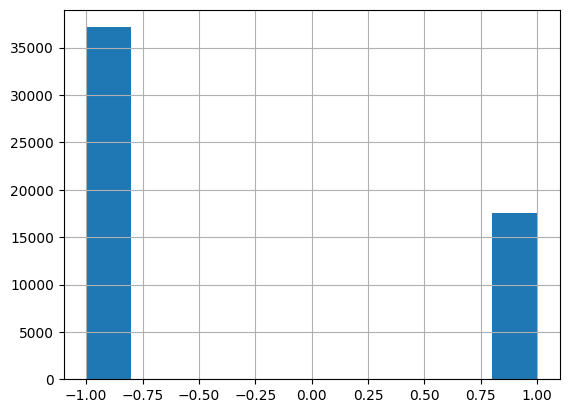

In [17]:
df.__PixelIntensityRelationshipSign.hist()

In [18]:
df.__PixelIntensityRelationship.count()

54701

<AxesSubplot: >

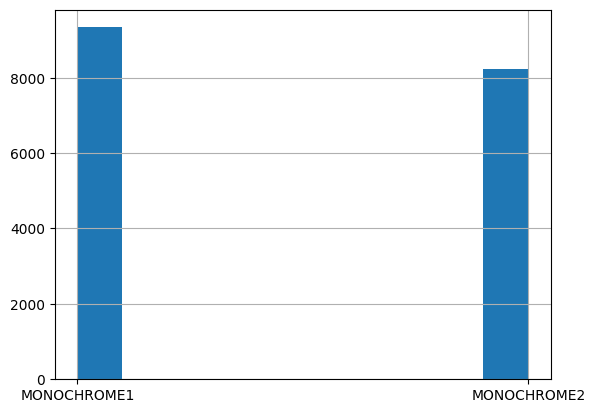

In [19]:
df[df.__PixelIntensityRelationshipSign == 1].__PhotometricInterpretation.hist()

-1 and not_invert

<AxesSubplot: >

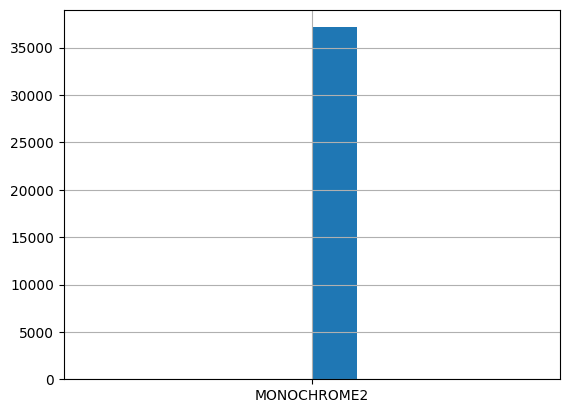

In [20]:
df[df.__PixelIntensityRelationshipSign == -1].__PhotometricInterpretation.hist()

In [21]:
temp_df = df[(df.__PixelIntensityRelationshipSign == -1) & (df.__PhotometricInterpretation == 'MONOCHROME1')]
for i, row in temp_df[:20].iterrows():
    display_dcm(row.patient_id, row.image_id)

../datasets/export/uint8_png/10038@1967300488.png


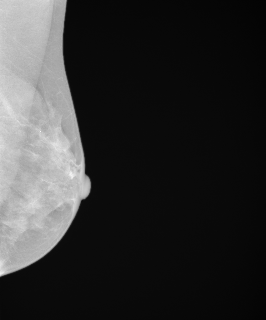


--------------------------

../datasets/export/uint8_png/10038@2142944869.png


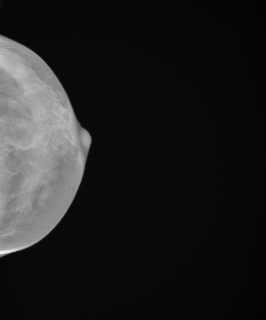


--------------------------

../datasets/export/uint8_png/10038@850559196.png


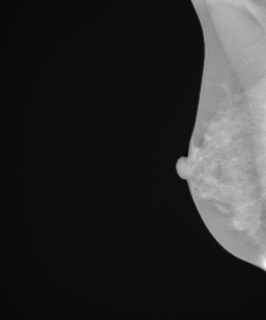


--------------------------

../datasets/export/uint8_png/10038@1350492010.png


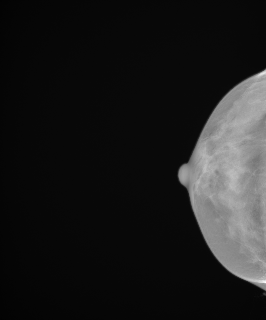


--------------------------

../datasets/export/uint8_png/10042@102733848.png


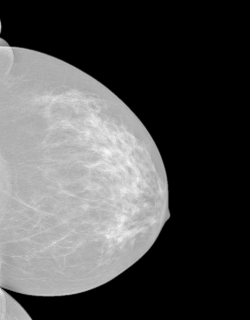


--------------------------

../datasets/export/uint8_png/10042@202939811.png


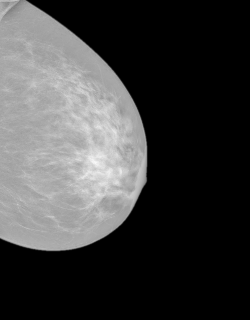


--------------------------

../datasets/export/uint8_png/10042@1648588715.png


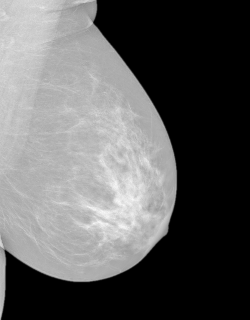


--------------------------

../datasets/export/uint8_png/10042@294481519.png


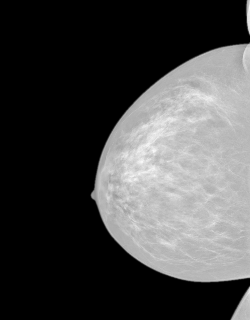


--------------------------

../datasets/export/uint8_png/10042@495770405.png


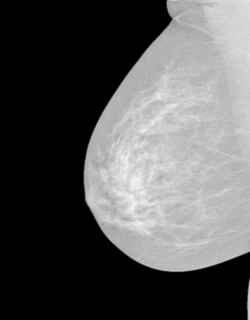


--------------------------

../datasets/export/uint8_png/10049@349510516.png


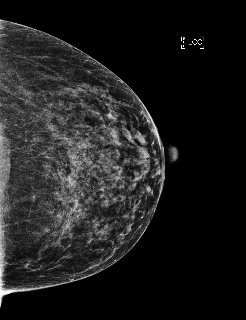


--------------------------

../datasets/export/uint8_png/10049@906829939.png


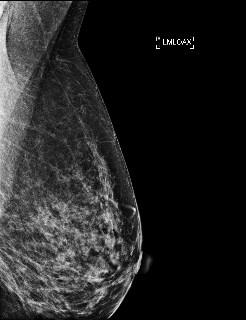


--------------------------

../datasets/export/uint8_png/10049@1464813991.png


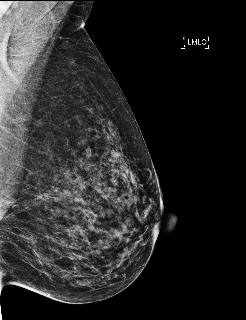


--------------------------

../datasets/export/uint8_png/10049@94335194.png


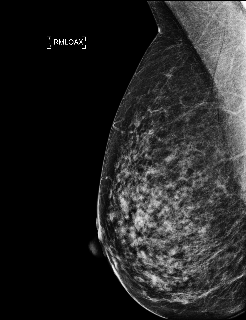


--------------------------

../datasets/export/uint8_png/10049@1207499426.png


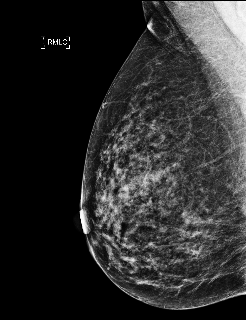


--------------------------

../datasets/export/uint8_png/10049@1351270472.png


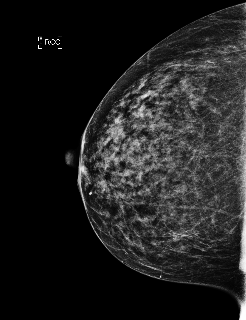


--------------------------

../datasets/export/uint8_png/10095@1450760951.png


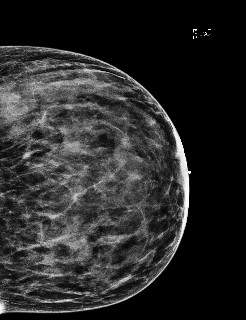


--------------------------

../datasets/export/uint8_png/10095@1854592291.png


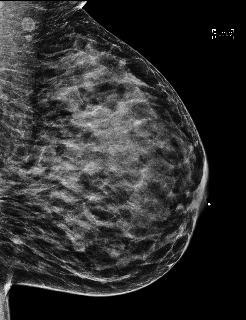


--------------------------

../datasets/export/uint8_png/10095@25264463.png


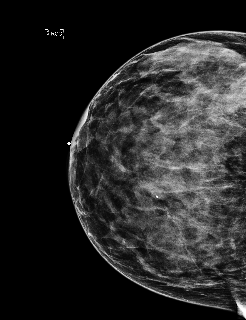


--------------------------

../datasets/export/uint8_png/10095@1276618392.png


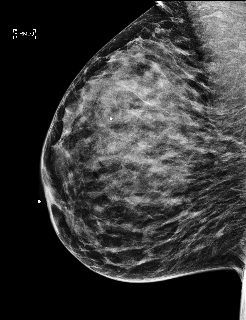


--------------------------

../datasets/export/uint8_png/10097@664674273.png


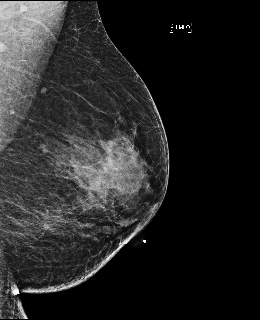


--------------------------



In [22]:
temp_df = df[(df.__PixelIntensityRelationshipSign == -1) & (df.__PhotometricInterpretation == 'MONOCHROME2')]
for i, row in temp_df[:20].iterrows():
    display_dcm(row.patient_id, row.image_id)

../datasets/export/uint8_png/10006@462822612.png


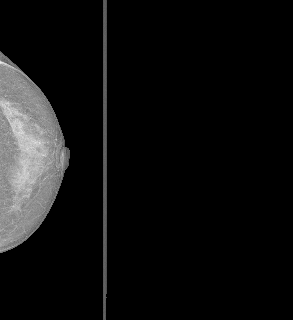


--------------------------

../datasets/export/uint8_png/10006@1459541791.png


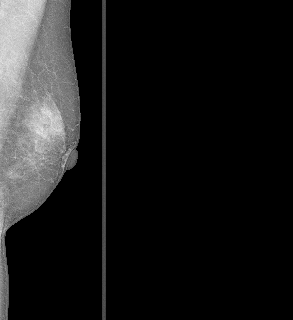


--------------------------

../datasets/export/uint8_png/10006@1864590858.png


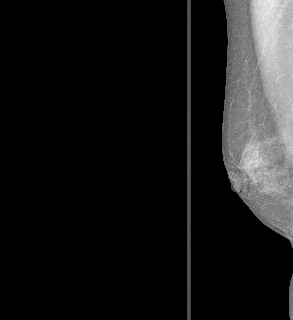


--------------------------

../datasets/export/uint8_png/10006@1874946579.png


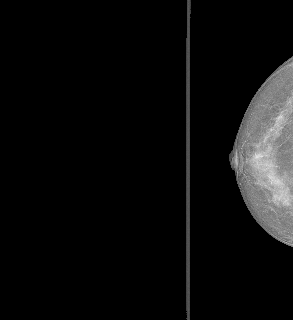


--------------------------

../datasets/export/uint8_png/10025@562340703.png


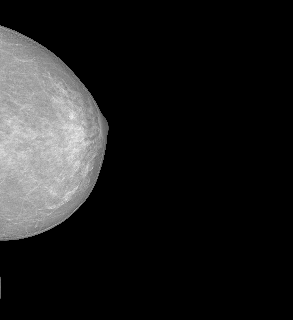


--------------------------

../datasets/export/uint8_png/10025@1365269360.png


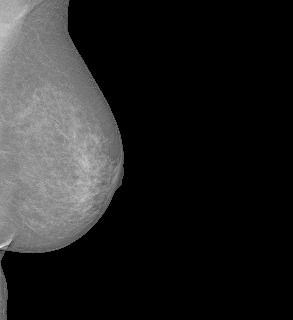


--------------------------

../datasets/export/uint8_png/10025@288394860.png


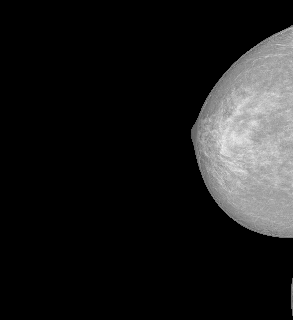


--------------------------

../datasets/export/uint8_png/10025@893612858.png


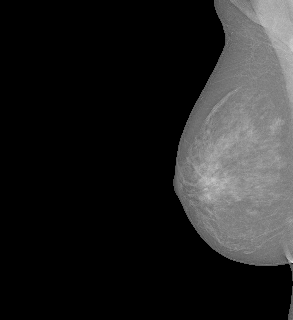


--------------------------

../datasets/export/uint8_png/10048@964141995.png


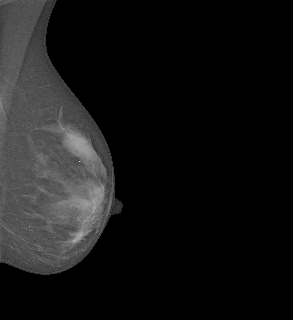


--------------------------

../datasets/export/uint8_png/10048@1234933874.png


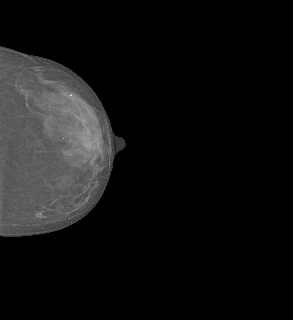


--------------------------

../datasets/export/uint8_png/10048@1577142909.png


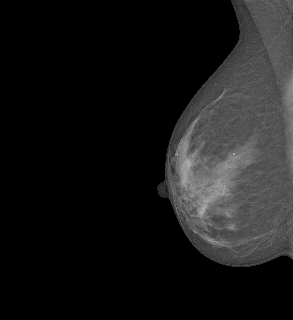


--------------------------

../datasets/export/uint8_png/10048@1842203124.png


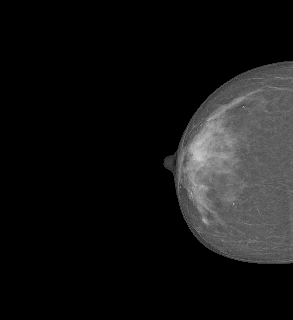


--------------------------

../datasets/export/uint8_png/10050@588678397.png


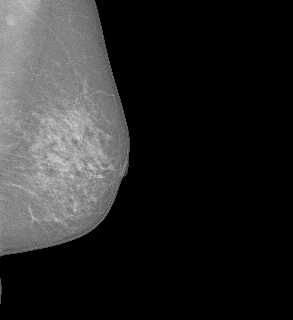


--------------------------

../datasets/export/uint8_png/10050@1749389520.png


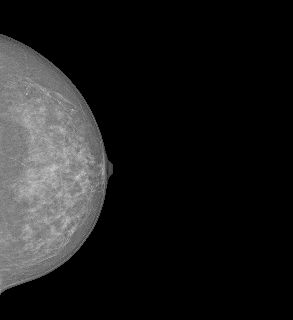


--------------------------

../datasets/export/uint8_png/10050@1428987847.png


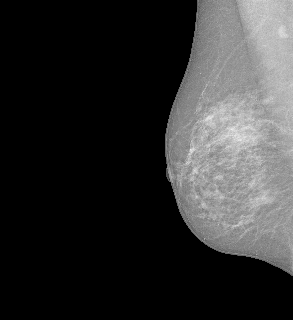


--------------------------

../datasets/export/uint8_png/10050@1614607569.png


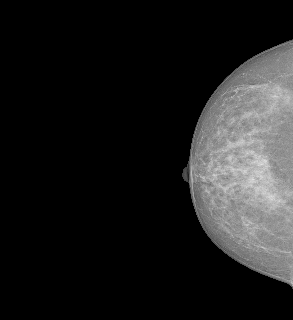


--------------------------

../datasets/export/uint8_png/10051@938549206.png


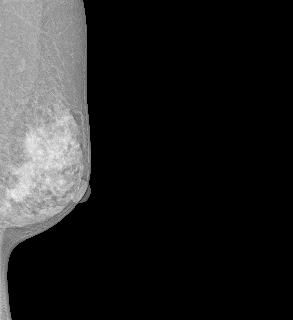


--------------------------

../datasets/export/uint8_png/10051@1238319934.png


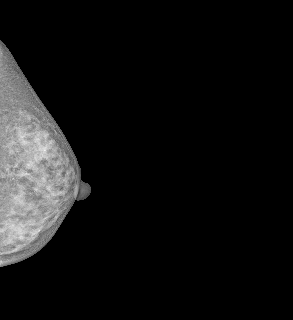


--------------------------

../datasets/export/uint8_png/10051@833024366.png


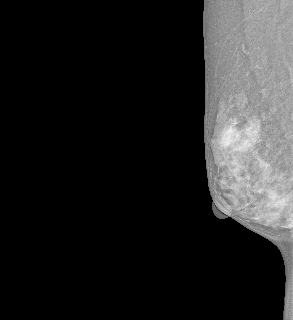


--------------------------

../datasets/export/uint8_png/10051@2046475482.png


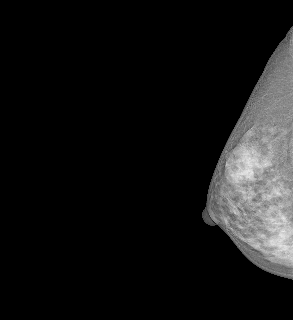


--------------------------



In [23]:
temp_df = df[(df.__PixelIntensityRelationshipSign == 1) & (df.__PhotometricInterpretation == 'MONOCHROME1')]
for i, row in temp_df[:20].iterrows():
    display_dcm(row.patient_id, row.image_id)
    

../datasets/export/uint8_png/10011@220375232.png


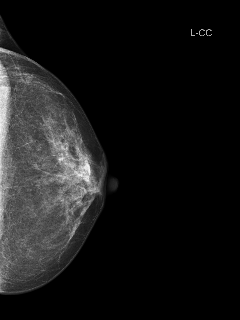


--------------------------

../datasets/export/uint8_png/10011@270344397.png


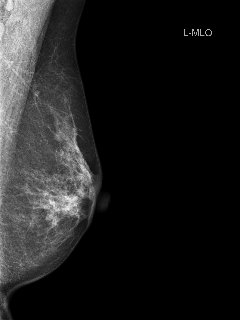


--------------------------

../datasets/export/uint8_png/10011@541722628.png


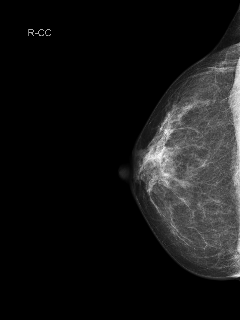


--------------------------

../datasets/export/uint8_png/10011@1031443799.png


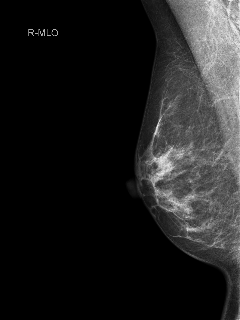


--------------------------

../datasets/export/uint8_png/10106@238675415.png


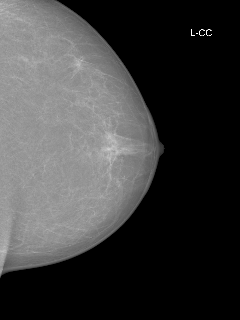


--------------------------

../datasets/export/uint8_png/10106@2057295788.png


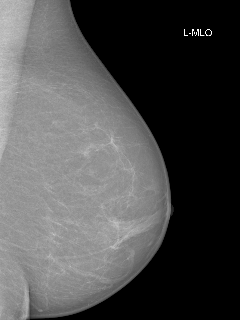


--------------------------

../datasets/export/uint8_png/10106@190315990.png


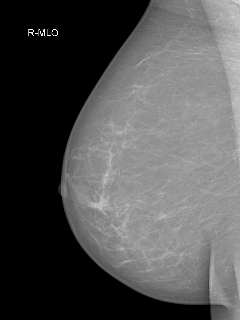


--------------------------

../datasets/export/uint8_png/10106@929085221.png


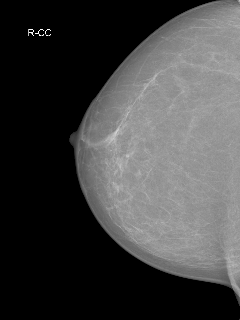


--------------------------

../datasets/export/uint8_png/10144@1260861056.png


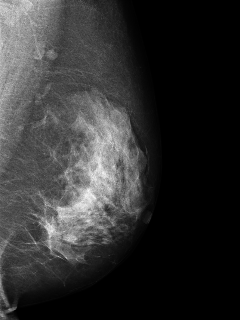


--------------------------

../datasets/export/uint8_png/10144@1830062849.png


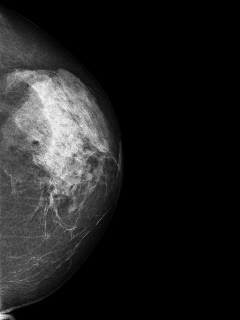


--------------------------

../datasets/export/uint8_png/10144@816393025.png


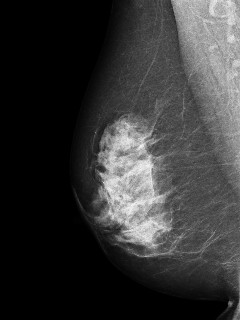


--------------------------

../datasets/export/uint8_png/10144@1516077730.png


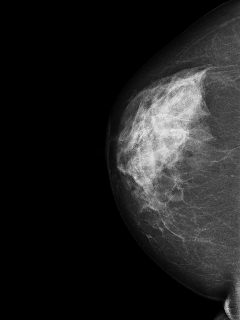


--------------------------

../datasets/export/uint8_png/1015@33561657.png


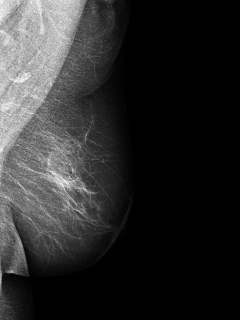


--------------------------

../datasets/export/uint8_png/1015@114671324.png


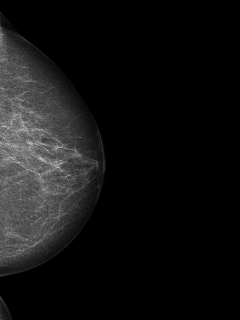


--------------------------

../datasets/export/uint8_png/1015@864576083.png


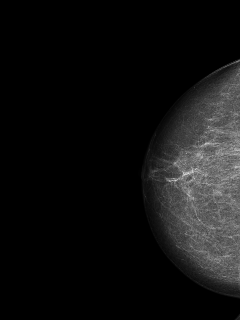


--------------------------

../datasets/export/uint8_png/1015@1622207304.png


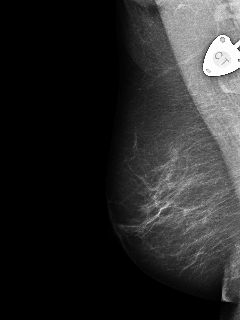


--------------------------

../datasets/export/uint8_png/10179@760010915.png


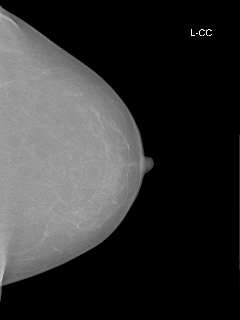


--------------------------

../datasets/export/uint8_png/10179@873499971.png


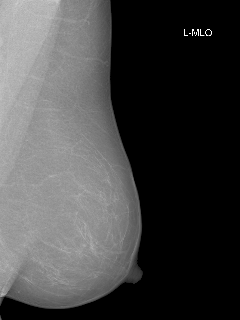


--------------------------

../datasets/export/uint8_png/10179@610638958.png


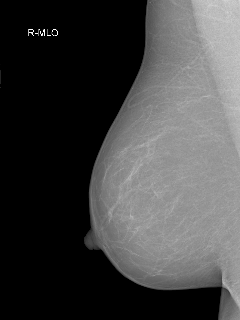


--------------------------

../datasets/export/uint8_png/10179@2015481666.png


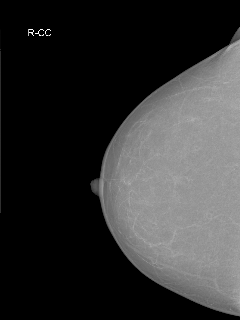


--------------------------



In [29]:
temp_df = df[(df.__PixelIntensityRelationshipSign == 1) & (df.__PhotometricInterpretation == 'MONOCHROME2')]
for i, row in temp_df[:20].iterrows():
    display_dcm(row.patient_id, row.image_id)

In [ ]:
df.columns

In [ ]:
def get_syntax_uid(patient_id, image_id):
    dcm_path = os.path.join('../datasets/train_images', str(patient_id), str(image_id) + '.dcm')
    dicom = pydicom.dcmread(dcm_path)
    return dicom.file_meta.TransferSyntaxUID

In [ ]:
# temp_df = df[(df.__PixelIntensityRelationshipSign == 1) & (df.__PhotometricInterpretation == 'MONOCHROME1')]
    
# for i, row in tqdm(temp_df.iterrows()):
#     syntax_uid = get_syntax_uid(row.patient_id, row.image_id)
#     if syntax_uid == '1.2.840.10008.1.2.4.90':
#         pass
#     else:
#         print('dicom')
#         display_dcm(row.patient_id, row.image_id)
    
    

In [33]:
df[(df.__PixelIntensityRelationshipSign == 1) & (df.__PhotometricInterpretation == 'MONOCHROME2')].machine_id.value_counts()

21    8221
Name: machine_id, dtype: int64

In [32]:
df[(df.__PixelIntensityRelationshipSign == 1) & (df.__PhotometricInterpretation == 'MONOCHROME1')].machine_id.value_counts()

29     8267
210    1070
Name: machine_id, dtype: int64

In [70]:


class DicomMetadata:
    def __init__(self, ds):
        temp = ds['WindowWidth']
        self.window_widths = [float(e) for e in temp] if temp.VM > 1 else [float(temp.value)]
        temp = ds['WindowCenter']
        self.window_centers = [float(e) for e in temp] if temp.VM > 1 else [float(temp.value)]
        # if nan --> LINEAR
        self.voilut_func = ds.get('VOILUTFunction', 'LINEAR')
        assert len(self.window_widths) == len(self.window_widths)
        
        
        
dcm = pydicom.dcmread('../datasets/train_images/10006/1459541791.dcm')
meta = DicomMetadata(dcm)
meta

In [71]:
meta.window_widths

[1091.97, 1091.97, 1091.97, 1091.97]

In [72]:
meta.window_centers

[1802.31, 1802.31, 2020.704, 1583.916]

In [74]:
meta.voilut_func

'SIGMOID'

In [76]:
import dicomsdl

In [77]:
dcm = dicomsdl.open('../datasets/train_images/10006/1459541791.dcm')

In [78]:
dcm.VOILUTFunction

'SIGMOID'

In [81]:
type(dcm.WindowWidth[0])

float

In [82]:
dcm.BitsStored

16

In [85]:
dcm['WindowWidth']

[1091.97, 1091.97, 1091.97, 1091.97]

In [92]:
dcm['VOILUTFunction']

'SIGMOID'

In [93]:
dcm.PhotometricInterpretation

'MONOCHROME1'

# DF EDA

In [15]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.10006,US,NO,16,NaN,NaN,"[1802.31, 1802.31, 2020.704, 1583.916]",4,"[1091.97, 1091.97, 1091.97, 1091.97]",4
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.10011,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,...,1.2.840.10009.1.2.3.9973,US,NaN,12,130.7771,AutoFilter,[2047.0],1,[4096.0],1
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1062 mm 490 mm 180 mm ...,"[2616.0, 2676.0, 2496.0]",3,"[900.0, 750.0, 1050.0]",3
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,...,1.2.840.10009.1.2.3.9989,US,NaN,12,40.0000,AOP standard RECTANGLE 1092 mm 370 mm 180 mm ...,"[2614.0, 2668.0, 2512.0]",3,"[900.0, 750.0, 1050.0]",3
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,...,1.2.840.10009.1.2.3.9989,US,NaN,12,60.0000,AOP standard RECTANGLE 822 mm 490 mm 180 mm 2...,"[2638.0, 2674.0, 2572.0]",3,"[900.0, 750.0, 1050.0]",3


In [16]:
df.cancer.value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

In [17]:
df.patient_id.nunique()

11913

In [18]:
df[df.cancer == 1].patient_id.nunique()

486

In [19]:
df[df.cancer == 1]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,...,1.2.840.10009.1.2.3.10130,US,NaN,12,48.48538,AutoFilter,[2047.0],1,[4096.0],1
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,...,1.2.840.10009.1.2.3.10130,US,NaN,12,75.61940,AutoFilter,[2047.0],1,[4096.0],1
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,...,1.2.840.10009.1.2.3.10130,US,NaN,12,65.38854,AutoFilter,[2047.0],1,[4096.0],1
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,...,1.2.840.10009.1.2.3.10130,US,NaN,12,73.39530,AutoFilter,[2047.0],1,[4096.0],1
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,...,1.2.840.10009.1.2.3.10226,US,NaN,12,124.54960,AutoFilter,[2047.0],1,[4096.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54485,2,9707,1900919592,R,MLO,56.0,1,1,1,NaN,...,1.2.840.10009.1.2.3.9707,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
54593,2,9840,111786935,R,MLO,59.0,1,1,1,NaN,...,1.2.840.10009.1.2.3.9840,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
54594,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,...,1.2.840.10009.1.2.3.9840,US,NO,12,NaN,NaN,[2048.0],1,[4096.0],1
54595,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,...,1.2.840.10009.1.2.3.9851,US,NaN,12,NaN,NaN,[2047.0],1,[4096.0],1


All patients have CC and MLO images for both sides

In [43]:
for patient_id, sub_df in df.groupby('patient_id'):
    cancer_sum = sub_df.cancer.sum()
    if cancer_sum == 0:
        continue
        
    num_unique_implant = sub_df.implant.nunique()
    num_cancer_unique_laterality = sub_df[sub_df.cancer==1].laterality.nunique()
    num_noncancer_unique_laterality = sub_df[sub_df.cancer==0].laterality.nunique()
    if cancer_sum < len(sub_df):
        print(patient_id, cancer_sum, len(sub_df), num_cancer_unique_laterality, num_noncancer_unique_laterality, sub_df.laterality.nunique())
        assert num_cancer_unique_laterality == 1
        assert num_noncancer_unique_laterality == 1
        assert sub_df.laterality.nunique() == 2
        assert num_unique_implant == 1
        
    for laterality, sub_df2 in sub_df.groupby('laterality'):
        views = sub_df2.view.unique()
        assert len(views) >= 2
        assert 'CC' in views and 'MLO' in views
    
        
        
        
        
print('Done.')

106 2 4 1 1 2
236 2 5 1 1 2
283 2 4 1 1 2
500 2 4 1 1 2
729 2 4 1 1 2
826 2 4 1 1 2
865 2 4 1 1 2
1025 2 4 1 1 2
1109 2 5 1 1 2
1336 2 4 1 1 2
1524 3 5 1 1 2
1703 2 4 1 1 2
1775 2 4 1 1 2
1878 3 6 1 1 2
1963 3 7 1 1 2
2133 2 4 1 1 2
2179 2 4 1 1 2
2346 3 6 1 1 2
2489 3 5 1 1 2
2679 2 4 1 1 2
2938 2 5 1 1 2
2989 2 5 1 1 2
3021 2 4 1 1 2
3346 2 4 1 1 2
3510 2 4 1 1 2
3542 5 9 1 1 2
3568 2 4 1 1 2
3626 3 7 1 1 2
3670 2 4 1 1 2
3713 2 4 1 1 2
4083 3 5 1 1 2
4202 2 4 1 1 2
4340 2 4 1 1 2
4696 2 4 1 1 2
4824 2 4 1 1 2
4888 3 5 1 1 2
4917 2 5 1 1 2
4953 3 6 1 1 2
5059 2 4 1 1 2
5235 2 5 1 1 2
5444 2 4 1 1 2
5608 2 5 1 1 2
5769 2 4 1 1 2
5820 2 4 1 1 2
5878 2 4 1 1 2
5911 2 4 1 1 2
6018 5 8 1 1 2
6038 2 4 1 1 2
6107 3 6 1 1 2
6303 3 6 1 1 2
6637 3 6 1 1 2
6658 2 4 1 1 2
6659 4 8 1 1 2
6668 2 4 1 1 2
6853 2 4 1 1 2
7053 2 4 1 1 2
7151 4 6 1 1 2
7196 2 4 1 1 2
7339 3 7 1 1 2
7493 2 4 1 1 2
7780 2 4 1 1 2
7964 2 4 1 1 2
8248 2 4 1 1 2
8403 2 4 1 1 2
8631 3 6 1 1 2
8641 2 4 1 1 2
8675 2 4 1 1 2
87

In [23]:
for machine_id, sub_df in df.groupby('machine_id'):
    print(machine_id, sub_df.site_id.unique())
        
print('Done.')

21 [2]
29 [2]
48 [2]
49 [1]
93 [1]
170 [1]
190 [1]
197 [1]
210 [1]
216 [1]
Done.


In [25]:
for implant, sub_df in df.groupby('implant'):
    num_cancer_patients = sub_df[sub_df.cancer == 1].patient_id.nunique()
    num_patients = sub_df.patient_id.nunique()
    print(implant, num_cancer_patients, num_patients, num_cancer_patients / num_patients)
        
print('Done.')

0 483 11742 0.04113438937148697
1 3 171 0.017543859649122806
Done.


In [28]:
temp = df.groupby('patient_id').machine_id.nunique()
temp

patient_id
5        1
25       1
28       1
30       1
33       1
        ..
65518    1
65525    1
65526    1
65530    1
65534    1
Name: machine_id, Length: 11913, dtype: int64

In [31]:
temp[temp > 1]

patient_id
22637    2
Name: machine_id, dtype: int64

In [34]:
df[df.patient_id == 22637]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,__Columns,__ImageLaterality,__PatientID,__RescaleSlope,__LossyImageCompression,__VOILUTFunction,__ContentDate,__RescaleIntercept,__ExposureControlMode,__Rows,__InstanceNumber,__PixelRepresentation,__SOPInstanceUID,__PixelPaddingValue,__SeriesInstanceUID,__HighBit,__PhotometricInterpretation,__PixelIntensityRelationshipSign,__SamplesPerPixel,__PixelSpacing,__ContentTime,__BitsAllocated,__BodyPartThickness,__PixelIntensityRelationship,__WindowCenter,__WindowWidth,__StudyInstanceUID,__RescaleType,__PartialView,__BitsStored,__CompressionForce,__ExposureControlModeDescription,__WindowCenterList,__WindowCenterListLength,__WindowWidthList,__WindowWidthListLength
11792,1,22637,347017785,L,MLO,65.0,0,0,0,NaN,0,A,93,False,2394,L,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,347017785,0,1.2.840.10009.1.2.3.22637.1.347017785,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184129.044331,16,45.0,LOG,"[2521, 2545, 2491]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,70.0,AOP standard RECTANGLE 880 mm 1436 mm 180 mm 2...,"[2521.0, 2545.0, 2491.0]",3,"[900.0, 750.0, 1050.0]",3
11793,1,22637,1172178848,L,MLO,65.0,0,0,0,NaN,0,A,93,False,2394,L,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,1172178848,0,1.2.840.10009.1.2.3.22637.1.1172178848,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184129.249424,16,55.0,LOG,"[2653, 2671, 2629]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,130.0,AOP standard RECTANGLE 880 mm 1436 mm 180 mm 2...,"[2653.0, 2671.0, 2629.0]",3,"[900.0, 750.0, 1050.0]",3
11794,1,22637,1993684471,L,CC,65.0,0,0,0,NaN,0,A,93,False,2394,L,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,1993684471,0,1.2.840.10009.1.2.3.22637.1.1993684471,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184129.546593,16,47.0,LOG,"[2509, 2527, 2485]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,90.0,AOP standard RECTANGLE 910 mm 1436 mm 180 mm 2...,"[2509.0, 2527.0, 2485.0]",3,"[900.0, 750.0, 1050.0]",3
11795,1,22637,286197565,R,MLO,65.0,0,0,0,0.0,0,A,93,True,2394,R,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,286197565,0,1.2.840.10009.1.2.3.22637.1.286197565,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184129.757282,16,54.0,LOG,"[2599, 2617, 2569]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,130.0,AOP standard RECTANGLE 940 mm 1436 mm 180 mm 2...,"[2599.0, 2617.0, 2569.0]",3,"[900.0, 750.0, 1050.0]",3
11796,1,22637,425671587,R,MLO,65.0,0,0,0,0.0,0,A,93,True,2394,R,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,425671587,0,1.2.840.10009.1.2.3.22637.1.425671587,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184130.163402,16,47.0,LOG,"[2521, 2545, 2497]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,110.0,AOP standard RECTANGLE 1120 mm 1406 mm 180 mm ...,"[2521.0, 2545.0, 2497.0]",3,"[900.0, 750.0, 1050.0]",3
11797,1,22637,1344937704,R,CC,65.0,0,0,0,0.0,0,A,190,True,1914,R,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,2294,1344937704,0,1.2.840.10009.1.2.3.22637.1.1344937704,NaN,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184130.490941,16,42.0,LOG,"[2293, 2317, 2257]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,110.0,AOP standard RECTANGLE 882 mm 1210 mm 180 mm ...,"[2293.0, 2317.0, 2257.0]",3,"[900.0, 750.0, 1050.0]",3
11798,1,22637,1574740592,R,CC,65.0,0,0,0,0.0,0,A,93,True,2394,R,22637,1.0,0.0,SIGMOID,20221118,0.0,AUTOMATIC,3062,1574740592,0,1.2.840.10009.1.2.3.22637.1.1574740592,0.0,1.2.840.10009.1.2.3.22637.1,11,MONOCHROME2,-1.0,1,NaN,184130.693281,16,44.0,LOG,"[2503, 2521, 2473]","[900, 750, 1050]",1.2.840.10009.1.2.3.22637,US,NaN,12,100.0,AOP standard RECTANGLE 1150 mm 1166 mm 180 mm ...,"[2503.0, 2521.0, 2473.0]",3,"[900.0, 750.0, 1050.0]",3


In [35]:
temp = df.groupby('patient_id').age.nunique()
temp[temp > 1]

Series([], Name: age, dtype: int64)

In [36]:
temp = df.groupby('patient_id').site_id.nunique()
temp[temp > 1]

Series([], Name: site_id, dtype: int64)

In [39]:
temp = df.groupby('patient_id').image_id.nunique()
temp[temp < 4]

Series([], Name: image_id, dtype: int64)

In [41]:
df.view.value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

In [42]:
df.laterality.value_counts()

R    27439
L    27267
Name: laterality, dtype: int64

In [44]:
df[df.implant == 1].patient_id.nunique() / df.patient_id.nunique()

0.014354066985645933

In [45]:
df.machine_id.value_counts()

49     23529
48      8699
29      8267
21      8221
93      1915
216     1908
210     1070
170      923
190      145
197       29
Name: machine_id, dtype: int64

In [46]:
df[df.machine_id == 197].patient_id.nunique()

4